# Import

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow.keras as keras
import numpy as np
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))


# Check Folder

In [4]:
fashion_dataset_path="Dataset_Split/train"
os.listdir(fashion_dataset_path)

['Anorak',
 'Blazer',
 'Blouse',
 'Bomber',
 'Button-Down',
 'Caftan',
 'Capris',
 'Cardigan',
 'Chinos',
 'Coat',
 'Coverup',
 'Culottes',
 'Cutoffs',
 'Dress',
 'Flannel',
 'Gauchos',
 'Halter',
 'Henley',
 'Hoodie',
 'Jacket',
 'Jeans',
 'Jeggings',
 'Jersey',
 'Jodhpurs',
 'Joggers',
 'Jumpsuit',
 'Kaftan',
 'Kimono',
 'Leggings',
 'Onesie',
 'Parka',
 'Peacoat',
 'Poncho',
 'Robe',
 'Romper',
 'Sarong',
 'Shorts',
 'Skirt',
 'Sweater',
 'Sweatpants',
 'Sweatshorts',
 'Tank',
 'Tee',
 'Top',
 'Trunks',
 'Turtleneck']

# Import Pretrained Model VGG16

In [5]:
vgg16 = keras.applications.vgg16
conv_model = vgg16.VGG16(weights='imagenet', include_top=False)
conv_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

# Load Dataset

In [6]:
TRAINING_DIR = "Dataset_Split/train"
VALIDATION_DIR = "Dataset_Split/val"
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 46

def DataLoad(shape, preprocessing): 
    '''Create the training and validation datasets for 
    a given image shape.
    '''   
    training_datagen = ImageDataGenerator(
        rescale = 1./255,
        preprocessing_function = preprocessing,
        horizontal_flip = True, 
        validation_split = 0.1)

    validation_datagen = ImageDataGenerator(rescale = 1./255)
    
    height, width = shape

    train_dataset = training_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(height, width),
        class_mode='categorical',
        batch_size=batch_size
    )

    val_dataset = validation_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(height, width),
        class_mode='categorical',
        batch_size=batch_size
    )
    return train_dataset, val_dataset

In [7]:
train_dataset, val_dataset = DataLoad((224,224), preprocessing=vgg16.preprocess_input)

Found 231349 images belonging to 46 classes.
Found 57863 images belonging to 46 classes.


In [8]:
# Function for plots images with labels within jupyter notebook
X_train, y_train = next(train_dataset)

# Load Pretrainded Model

In [9]:
conv_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [10]:
#  flatten the output of the convolutional part: 
x = keras.layers.Flatten()(conv_model.output)
# three hidden layers
x = keras.layers.Dense(200, activation='relu')(x)
x = keras.layers.Dense(200, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
# final softmax layer with 15 categories
predictions = keras.layers.Dense(46, activation='softmax')(x)

# creating the full model:
full_model = keras.models.Model(inputs=conv_model.input, outputs=predictions)
full_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# Train the Model

In [9]:
for layer in conv_model.layers:
    layer.trainable = False

In [10]:
from tensorflow.keras.optimizers import Adam
# Set the training parameters
full_model.compile(loss = 'categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [12]:
# Train the model
history = full_model.fit(train_dataset, epochs=10, steps_per_epoch=200, validation_data = val_dataset)

Epoch 1/10
200/200 [==============================] - 410s 2s/step - loss: 1.8761 - accuracy: 0.4600 - val_loss: 1.9478 - val_accuracy: 0.4417
Epoch 2/10
200/200 [==============================] - 411s 2s/step - loss: 1.7891 - accuracy: 0.4779 - val_loss: 1.9543 - val_accuracy: 0.4372
Epoch 3/10
200/200 [==============================] - 416s 2s/step - loss: 1.7277 - accuracy: 0.4892 - val_loss: 1.9180 - val_accuracy: 0.4411
Epoch 4/10
200/200 [==============================] - 417s 2s/step - loss: 1.7045 - accuracy: 0.4929 - val_loss: 1.8862 - val_accuracy: 0.4524
Epoch 5/10
200/200 [==============================] - 414s 2s/step - loss: 1.6581 - accuracy: 0.5117 - val_loss: 1.8420 - val_accuracy: 0.4719
Epoch 6/10
200/200 [==============================] - 419s 2s/step - loss: 1.6420 - accuracy: 0.5124 - val_loss: 1.8314 - val_accuracy: 0.4719
Epoch 7/10
200/200 [==============================] - 418s 2s/step - loss: 1.6139 - accuracy: 0.5214 - val_loss: 1.7952 - val_accuracy: 0.4823

# Evaluate

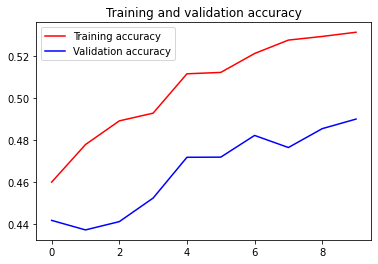

<Figure size 432x288 with 0 Axes>

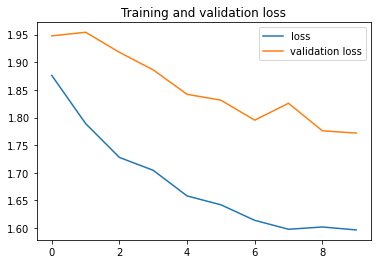

In [13]:
def plot_history(history):
    '''Plot loss and accuracy as a function of the epoch,
    for the training and validation datasets.
    '''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend(loc=0)
    plt.figure()

    
    # Plot training and validation loss per epoch
    plt.figure()

    plt.plot(epochs, loss, label='loss')
    plt.plot(epochs, val_loss, label='validation loss')
    plt.title('Training and validation loss')
    plt.legend(loc=0)
    
    plt.show()
    
plot_history(history)

# Save Model

In [19]:
# Save the entire model as my_model in .h5 format
# !mkdir saved_model
full_model.save('my_model.h5')

In [15]:
# Save the entire model as my_model 
# !mkdir saved_model
full_model.save('my_model')

INFO:tensorflow:Assets written to: my_model\assets


# Load Model

In [41]:
# Recreate the exact same model, including its weights and the optimizer
load_model = tf.keras.models.load_model('my_model3.h5')

# Show the model architecture
load_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# Continue Training

In [21]:
# Train the model
history = load_model.fit(train_dataset, epochs=5, steps_per_epoch=200, validation_data = val_dataset)

Epoch 1/5
200/200 [==============================] - 413s 2s/step - loss: 1.5761 - accuracy: 0.5376 - val_loss: 1.7527 - val_accuracy: 0.4882
Epoch 2/5
200/200 [==============================] - 406s 2s/step - loss: 1.5471 - accuracy: 0.5462 - val_loss: 1.7948 - val_accuracy: 0.4842
Epoch 3/5
200/200 [==============================] - 411s 2s/step - loss: 1.5528 - accuracy: 0.5390 - val_loss: 1.7753 - val_accuracy: 0.4925
Epoch 4/5
200/200 [==============================] - 408s 2s/step - loss: 1.5032 - accuracy: 0.5553 - val_loss: 1.8645 - val_accuracy: 0.4643
Epoch 5/5
200/200 [==============================] - 410s 2s/step - loss: 1.5291 - accuracy: 0.5525 - val_loss: 1.8914 - val_accuracy: 0.4431


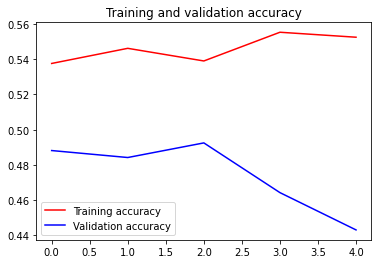

<Figure size 432x288 with 0 Axes>

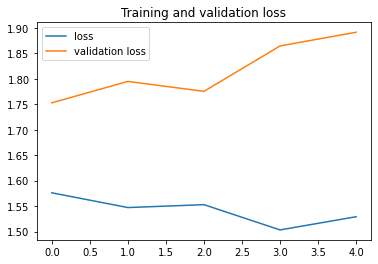

In [22]:
def plot_history(history):
    '''Plot loss and accuracy as a function of the epoch,
    for the training and validation datasets.
    '''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend(loc=0)
    plt.figure()
    
    # Plot training and validation loss per epoch
    plt.figure()

    plt.plot(epochs, loss, label='loss')
    plt.plot(epochs, val_loss, label='validation loss')
    plt.title('Training and validation loss')
    plt.legend(loc=0)
    
    plt.show()
    
plot_history(history)

In [23]:
# Save the entire model as my_model in .h5 format
# !mkdir saved_model
load_model.save('my_model2.h5')

In [28]:
# Recreate the exact same model, including its weights and the optimizer
load_model2 = tf.keras.models.load_model('my_model2.h5')

# Show the model architecture
load_model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [29]:
# Train the model
history = load_model2.fit(train_dataset, epochs=10, steps_per_epoch=200, validation_data = val_dataset)

Epoch 1/10
200/200 [==============================] - 397s 2s/step - loss: 1.5170 - accuracy: 0.5478 - val_loss: 1.6946 - val_accuracy: 0.5123
Epoch 2/10
200/200 [==============================] - 388s 2s/step - loss: 1.4961 - accuracy: 0.5573 - val_loss: 1.7632 - val_accuracy: 0.4861
Epoch 3/10
200/200 [==============================] - 389s 2s/step - loss: 1.5032 - accuracy: 0.5553 - val_loss: 1.7432 - val_accuracy: 0.4919
Epoch 4/10
200/200 [==============================] - 409s 2s/step - loss: 1.5418 - accuracy: 0.5463 - val_loss: 1.8585 - val_accuracy: 0.4626
Epoch 5/10
200/200 [==============================] - 397s 2s/step - loss: 1.5095 - accuracy: 0.5504 - val_loss: 1.7371 - val_accuracy: 0.4955
Epoch 6/10
200/200 [==============================] - 441s 2s/step - loss: 1.5026 - accuracy: 0.5528 - val_loss: 1.8060 - val_accuracy: 0.4815
Epoch 7/10
200/200 [==============================] - 407s 2s/step - loss: 1.5107 - accuracy: 0.5527 - val_loss: 1.7832 - val_accuracy: 0.4883

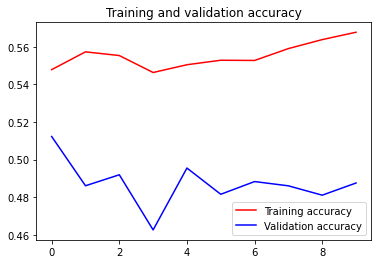

<Figure size 432x288 with 0 Axes>

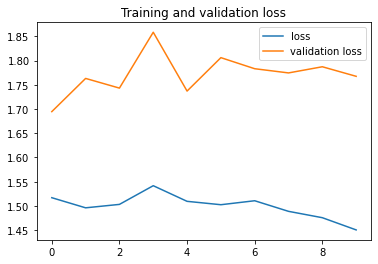

In [32]:
def plot_history(history):
    '''Plot loss and accuracy as a function of the epoch,
    for the training and validation datasets.
    '''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend(loc=0)
    plt.figure()
    
    # Plot training and validation loss per epoch
    plt.figure()

    plt.plot(epochs, loss, label='loss')
    plt.plot(epochs, val_loss, label='validation loss')
    plt.title('Training and validation loss')
    plt.legend(loc=0)
    
    plt.show()
    
plot_history(history)

In [50]:
# Save the entire model as my_model in .h5 format
# !mkdir saved_model
load_model2.save('my_model3.h5')

In [17]:
# Recreate the exact same model, including its weights and the optimizer
load_model2 = tf.keras.models.load_model('my_model3.h5')

# Show the model architecture
load_model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [18]:
label_map = (train_dataset.class_indices)
print(label_map)

{'Anorak': 0, 'Blazer': 1, 'Blouse': 2, 'Bomber': 3, 'Button-Down': 4, 'Caftan': 5, 'Capris': 6, 'Cardigan': 7, 'Chinos': 8, 'Coat': 9, 'Coverup': 10, 'Culottes': 11, 'Cutoffs': 12, 'Dress': 13, 'Flannel': 14, 'Gauchos': 15, 'Halter': 16, 'Henley': 17, 'Hoodie': 18, 'Jacket': 19, 'Jeans': 20, 'Jeggings': 21, 'Jersey': 22, 'Jodhpurs': 23, 'Joggers': 24, 'Jumpsuit': 25, 'Kaftan': 26, 'Kimono': 27, 'Leggings': 28, 'Onesie': 29, 'Parka': 30, 'Peacoat': 31, 'Poncho': 32, 'Robe': 33, 'Romper': 34, 'Sarong': 35, 'Shorts': 36, 'Skirt': 37, 'Sweater': 38, 'Sweatpants': 39, 'Sweatshorts': 40, 'Tank': 41, 'Tee': 42, 'Top': 43, 'Trunks': 44, 'Turtleneck': 45}


# Load Model Test

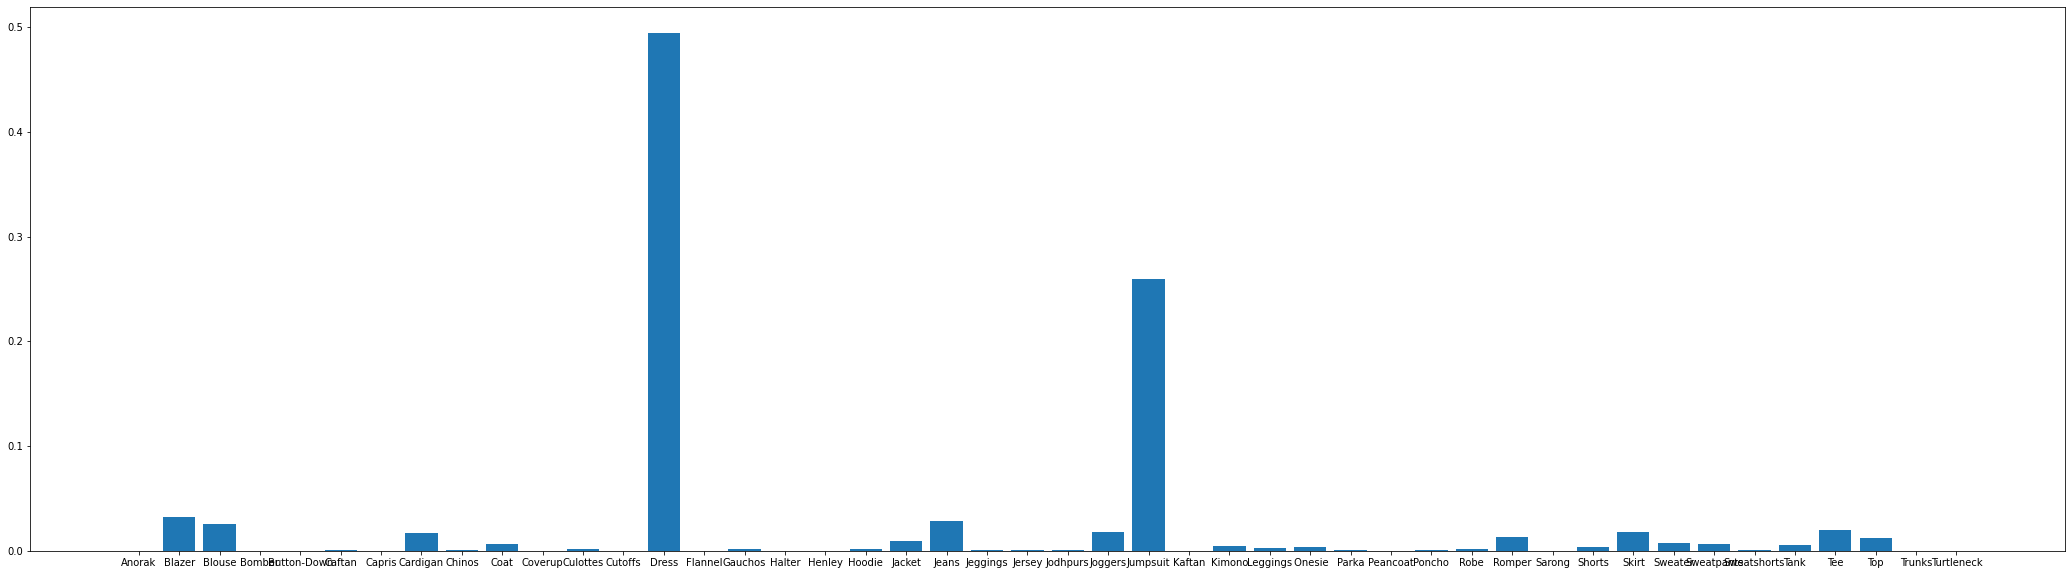

In [32]:
# load_model_sample.py
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os


def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor


if __name__ == "__main__":

    # load model
    model = load_model("my_model3.h5")

    # image path
    img_path = 'Dataset_Split/val/Dress/195581img_00000062.jpg'

    # load a single image
    new_image = load_image(img_path)

    # check prediction
    pred = model.predict_step(new_image)
    
    # print(pred[0])
    
names = ['Anorak', 'Blazer', 'Blouse', 'Bomber', 'Button-Down', 'Caftan', 'Capris', 'Cardigan',
         'Chinos', 'Coat', 'Coverup', 'Culottes', 'Cutoffs', 'Dress', 'Flannel', 'Gauchos', 'Halter',
         'Henley', 'Hoodie', 'Jacket', 'Jeans', 'Jeggings', 'Jersey', 'Jodhpurs', 'Joggers', 'Jumpsuit', 'Kaftan',
         'Kimono', 'Leggings', ' Onesie', 'Parka', 'Peancoat', 'Poncho', 'Robe', 'Romper', 'Sarong',
         'Shorts', 'Skirt', 'Sweater', 'Sweatpants', 'Sweatshorts', 'Tank', 'Tee', 'Top', 'Trunks', 'Turtleneck']
values = np.array(pred[0])

plt.figure(figsize=(124, 10))

plt.subplot(131)
plt.bar(names, values)
# plt.suptitle('Categorical Plotting')
plt.show()
 


# Confussion Matrix

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_dir=VALIDATION_DIR
test_datagen = ImageDataGenerator()

In [27]:
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=500, class_mode='categorical')
X_test, y_test = next(test_generator)
X_test=X_test/255
preds = load_model2.predict(X_test)
pred_labels = np.argmax(preds, axis=1)
true_labels = np.argmax(y_test, axis=1)
print('')

names = ['Anorak', 'Blazer', 'Blouse', 'Bomber', 'Button-Down', 'Caftan', 'Capris', 'Cardigan',
         'Chinos', 'Coat', 'Coverup', 'Culottes', 'Cutoffs', 'Dress', 'Flannel', 'Gauchos', 'Halter',
         'Henley', 'Hoodie', 'Jacket', 'Jeans', 'Jeggings', 'Jersey', 'Jodhpurs', 'Joggers', 'Jumpsuit', 'Kaftan',
         'Kimono', 'Leggings', ' Onesie', 'Parka', 'Peancoat', 'Poncho', 'Robe', 'Romper', 'Sarong',
         'Shorts', 'Skirt', 'Sweater', 'Sweatpants', 'Sweatshorts', 'Tank', 'Tee', 'Top', 'Trunks', 'Turtleneck']

for i in range(0,5):
    class_labels2=[names[i] for i,prob in enumerate(y_test[i]) if prob > 0.0]
    print("Predicted:",names[np.argmax(preds[i])])
    print("True:",names[np.argmax(y_test[i])])
    print('')



Found 57863 images belonging to 46 classes.

Predicted: Dress
True: Shorts

Predicted: Tee
True: Blouse

Predicted: Jeans
True: Tee

Predicted: Dress
True: Dress

Predicted: Dress
True: Dress



In [28]:
predicted_categories = tf.argmax(preds, axis=1)
print(predicted_categories)
true_categories = tf.argmax(y_test, axis=1)
print(true_categories)

tf.Tensor(
[13 42 20 13 13 25 13 37  7  2  1  2 24 13 42 42 13 42 41  1 42 13 38  2
 13 37 38 24  2 24 38 39 25  2 38 13 41 24 25 42 42  7 38 42 13 13 42 13
 20  2 20 13 13 42 13 42 13 42 13 38 13 28 24 13 13 38 36 20 13  1 13 19
 38  1 42 42 19  1 19  7 41 13 36  7 13 38 13 13 19 41 42 13 24 42 42  7
 13 18 20  2 41 20 42 24 20 13 42 13 42 37 42  2 13  2 41 13 42 13 37 42
  2 42  7  2 42 13 19 13 13 13 25 42 13 13 42 20 20  7 13 38 38 13 13 37
 13 42 39 42 20 13 13 13 13 42 42  2  2 20 37 13 13 42 42 41 42 37  7  7
  2 13 13 38  2 28 27 13 42 41  2 13 42 13  2 39 20 39  1 20 13 13 42 42
 37 36 36  1 13 13 13 42  7 13 13 13 42 13 13 24 13 18 13 25  1 13 41 42
  2 41  7 13 13 13 42 42 42  7 13 41 13 13 42 13 42 24 42 13 38 37  2 42
 39 38 20  2 42 20  2 20 20 38 42 36 42 13 41 42 39 42 42 42 13 13 13 13
 13 38 28 42 24 38 41 13 42  2  2 13 28 20 13 20  7 20 13 36 42 13  2 42
 13 38 42 20  2  7 13 13 13 13 13 20 20 41 13 41 42  7 37 41 13 13 13 41
 13 13  2 13 13 36 24  7 37 13 13 41 38 

In [29]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(predicted_categories, true_categories)
print(cf_matrix)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   6   2   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0
    0   0   1   1   0   0   0   0   0   1   0]
 [  0   1  16   5   0   0   0   1   0   0   0   4   0   0   0   0   0   1
    0   0   2   0   0   0   0   2   4   3   0]
 [  0   0   1   8   0   0   0   3   0   0   0   2   0   0   0   0   2   0
    1   2   0   0   2   0   0   0   0   1   0]
 [  0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   3   2   0   0   0 121   0   0   0   0   0   0   0   2   1   2
    0   6   2   5   0   0   0   3   2   2   0]
 [  0   0   0   0   0   0   0   

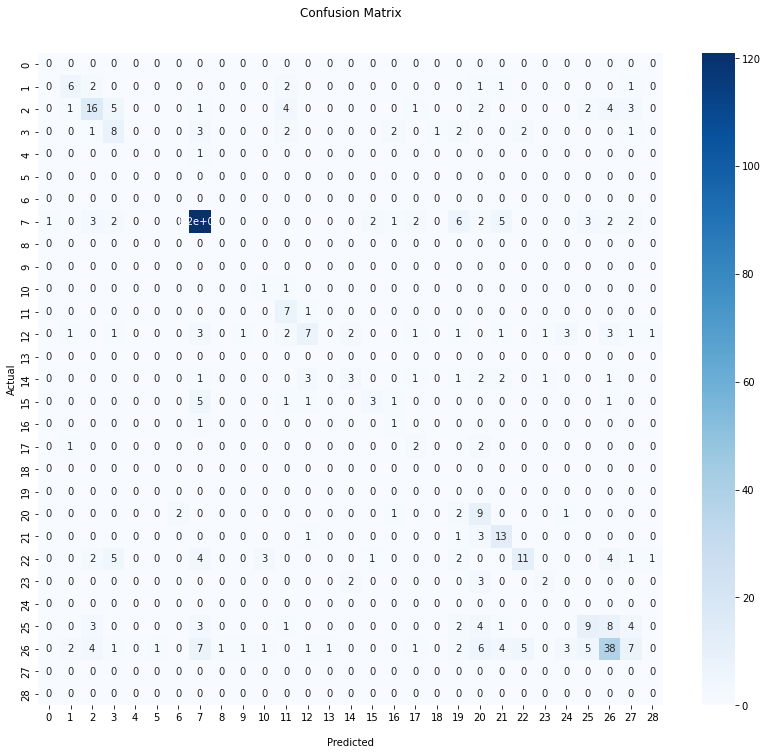

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12))

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted')
ax.set_ylabel('Actual');

## Ticket labels - List must be in alphabetical order
# ax.xaxis.set_ticklabels(['Anorak', 'Blazer', 'Blouse', 'Bomber', 'Button-Down', 'Caftan', 'Capris', 'Cardigan',
#          'Chinos', 'Coat', 'Coverup', 'Culottes', 'Cutoffs', 'Dress', 'Flannel', 'Gauchos', 'Halter',
#          'Henley', 'Hoodie', 'Jacket', 'Jeans', 'Jeggings', 'Jersey', 'Jodhpurs', 'Joggers', 'Jumpsuit', 'Kaftan',
#          'Kimono', 'Leggings', ' Onesie', 'Parka', 'Peancoat', 'Poncho', 'Robe', 'Romper', 'Sarong',
#          'Shorts', 'Skirt', 'Sweater', 'Sweatpants', 'Sweatshorts', 'Tank', 'Tee', 'Top', 'Trunks', 'Turtleneck'])
# ax.yaxis.set_ticklabels(['Anorak', 'Blazer', 'Blouse', 'Bomber', 'Button-Down', 'Caftan', 'Capris', 'Cardigan',
#          'Chinos', 'Coat', 'Coverup', 'Culottes', 'Cutoffs', 'Dress', 'Flannel', 'Gauchos', 'Halter',
#          'Henley', 'Hoodie', 'Jacket', 'Jeans', 'Jeggings', 'Jersey', 'Jodhpurs', 'Joggers', 'Jumpsuit', 'Kaftan',
#          'Kimono', 'Leggings', ' Onesie', 'Parka', 'Peancoat', 'Poncho', 'Robe', 'Romper', 'Sarong',
#          'Shorts', 'Skirt', 'Sweater', 'Sweatpants', 'Sweatshorts', 'Tank', 'Tee', 'Top', 'Trunks', 'Turtleneck'])

## Display the visualization of the Confusion Matrix.
plt.show()